## Part I -  Prosper Loan Data Exploration

Filipa Fontes

### Introduction

- This document explores a financial dataset related to loans, borrowers, lenders and  interest rates from last
  quarter of 2005 to 2014.
                   
- This dataset contains 113937 observations and 81 variables/columns.
                   
- The focus of this project is to  communicate the findings and insights through univariate,bivariate and   multivariate Exploration and built a final explanatory visual to support a storytelling.
  

### Gathering

In [1]:
#Installing/updating libs
#!pip install -U seaborn~=0.11 --user
#!pip install -U matplotlib~=3.5 --user

In [2]:
# import all packages and set plots to be embedded inline
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

cmap = sns.color_palette("mako", as_cmap=True)
cmap2 = sns.color_palette("cubehelix", as_cmap=True)
SMALL_SIZE = 8
mpl.rc('font', size=SMALL_SIZE)
mpl.rc('axes', titlesize=SMALL_SIZE)
sns.set_style("darkgrid")

In [3]:
#load in the dataset into a pandas dataframe, print statistics
pd.set_option('max_colwidth', 10)
pd.set_option('display.max_columns', 81)
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,102133...,193129,2007-0...,C,36,Completed,2009-0...,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-e...,2.0,True,True,NaN,2007-0...,640.0,659.0,2001-1...,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,00...",True,3083.3...,E33A34...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-0...,Q3 2007,1F3E33...,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,102736...,1209647,2014-0...,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Profes...,Employed,44.0,False,False,NaN,2014-0...,680.0,699.0,1996-0...,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,00...",True,6125.0...,9E3B37...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-0...,Q1 2014,1D1337...,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE933...,81716,2007-0...,HR,36,Completed,2009-1...,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not av...,NaN,False,True,783C33...,2007-0...,480.0,499.0,2002-0...,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not di...,True,2083.3...,695433...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-0...,Q1 2007,5F7033...,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF535...,658116,2012-1...,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skille...,Employed,113.0,True,False,NaN,2012-1...,800.0,819.0,1983-0...,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,00...",True,2875.0...,A03936...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-1...,Q4 2012,9ADE35...,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F0235...,909464,2013-0...,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-0...,680.0,699.0,2004-0...,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.3...,A18036...,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-0...,Q3 2013,36CE35...,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loans.tail()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113932,E6D935...,753087,2013-0...,NaN,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,4.0,C,5.0,1,IL,Food S...,Employed,246.0,True,False,NaN,2013-0...,700.0,719.0,1997-0...,9.0,9.0,41.0,9,209.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,"$50,00...",True,4333.3...,9BD736...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,11,88485,10000,2013-0...,Q2 2013,2EC435...,364.74,3647.4000,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB35...,537216,2011-1...,NaN,36,FinalP...,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,A,8.0,7,PA,Profes...,Employed,21.0,True,False,NaN,2011-1...,700.0,719.0,1992-0...,14.0,13.0,39.0,9,495.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,"$75,00...",True,8041.6...,62D936...,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,0,NaN,28,55801,2000,2011-1...,Q4 2011,55C433...,65.57,2330.5500,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E135...,1069178,2013-1...,NaN,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,3.0,D,3.0,1,TX,Other,Employed,84.0,True,False,NaN,2013-1...,700.0,719.0,2002-0...,12.0,12.0,25.0,9,521.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,"$25,00...",True,2875.0...,DD1A37...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123122,10000,2013-1...,Q4 2013,0FE037...,273.35,546.7000,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB35...,539056,2011-1...,NaN,60,Completed,2013-0...,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,4.0,C,5.0,2,GA,Food S...,Full-time,94.0,True,False,NaN,2011-1...,680.0,699.0,1993-1...,11.0,11.0,22.0,7,488.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,"$25,00...",True,3875.0...,589536...,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,0,NaN,28,56401,15000,2011-1...,Q4 2011,A33834...,449.55,21122....,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED36...,1140093,2014-0...,NaN,36,Current,NaN,0.13189,0.1039,0.0939,0.09071,0.0299,0.06081,6.0,A,7.0,1,NY,Professor,Employed,244.0,False,False,NaN,2014-0...,680.0,699.0,1995-0...,10.0,9.0,44.0,8,289.0,0.0,1.0,1.0,257.0,3.0,1.0,0.0,6166.0,0.80,675.0,36.0,0.75,0.0,0.23,"$50,00...",True,4583.3...,00AF37...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,127508,2000,2014-0...,Q1 2014,CE1E37...,64.90,64.3307,47.25,17.0807,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# high-level overview of data shape and composition
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?
 - This dataset contains 113937 observations and 81 variables/columns.
     

### What is/are the main feature(s) of interest in your dataset?

 - Out of these 81 variables, the analysis will focus on the relationship of the Borrower APR with the 13 variables selected in the subset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the loan cateogory,term,rating, employment status and owning a home or income range will also have effects on the APR.


### Cleaning

In [6]:
#Creating a copy
loan_clean = loans.copy()

In [7]:
#Converting 'LoanOriginationDate' to datetime and extracting year
loan_clean['Year'] = pd.to_datetime(loan_clean['LoanOriginationDate'])
loan_clean['Year']= loan_clean['Year'].dt.year

In [8]:
#Checking for duplicates
loan_clean.duplicated().sum()

0

In [9]:
#investigating the nulls
pd.set_option('max_colwidth', 15)
pd.set_option('display.max_columns', 81)
loan_clean.BorrowerAPR.isna().sum()

25

In [10]:
#Finding the mean of the BorrowerAPR having NaN and replacing
mean_value=loan_clean['BorrowerAPR'].mean()
loan_clean.BorrowerAPR.fillna(value=mean_value,inplace=True)

In [11]:
loan_clean.BorrowerAPR.isna().sum()

0

In [12]:
#Converting listing category number to names using a dictionary
dict_cat = {
        0: 'Not Available',
        1: 'Debt Consolidation',
        2: 'Home Improvement',
        3: 'Business',
        4: 'Personal Loan',
        5: 'Student Use',
        6: 'Auto',
        7: 'Other',
        8: 'Baby Adoption',
        9: 'Boat',
        10: 'Cosmetic Procedure',
        11: 'Engagement Ring',
        12: 'Green Loans',
        13: 'Household Expenses',
        14: 'Large Purchases',
        15: 'Medical Dental',
        16: 'Motorcycle',
        17: 'RV',
        18: 'Taxes',
        19: 'Vacation',
        20: 'Wedding Loans'
    }
loan_clean['ListingCategory'] = loan_clean['ListingCategory (numeric)']
loan_clean.replace({"ListingCategory": dict_cat},inplace=True)

In [13]:
loan_clean.ListingCategory.sample(1)

50106    Debt Consol...
Name: ListingCategory, dtype: object

In [14]:
#Converting 'objects' to 'categories'
loan_clean[loan_clean.select_dtypes(['object']).columns] = loan_clean.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [15]:
# ordered categorical types
ordinal_var_dict = {
    'IncomeRange': [
        'Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999',
        '$50,000-74,999', '$75,000-99,999', '$100,000+'
    ],
    'LoanOriginationQuarter': [
        'Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008',
        'Q3 2008', 'Q4 2008', 'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009',
        'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 'Q1 2011', 'Q2 2011',
        'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
        'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014'
    ]
}

for col in ordinal_var_dict:

    loan_clean[col] = loan_clean[col].cat.set_categories(ordinal_var_dict[col],
                                                         ordered=True)

In [16]:
#Selecting variables of interest
loans_subset = loan_clean.iloc[:, [
    2, 4, 5, 7, 14, 21, 47, 49, 63, 64, 65, 67, 81, 82
]]

In [17]:
loans_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ListingCreationDate     113937 non-null  category
 1   Term                    113937 non-null  int64   
 2   LoanStatus              113937 non-null  category
 3   BorrowerAPR             113937 non-null  float64 
 4   ProsperRating (Alpha)   84853 non-null   category
 5   IsBorrowerHomeowner     113937 non-null  bool    
 6   IncomeRange             113937 non-null  category
 7   StatedMonthlyIncome     113937 non-null  float64 
 8   LoanOriginalAmount      113937 non-null  int64   
 9   LoanOriginationDate     113937 non-null  category
 10  LoanOriginationQuarter  108009 non-null  category
 11  MonthlyLoanPayment      113937 non-null  float64 
 12  Year                    113937 non-null  int64   
 13  ListingCategory         113937 non-null  category
dtypes: b

### Visuals

In [18]:
#Numeric statistics
pd.set_option('max_colwidth',15)
pd.set_option('display.max_columns', 15)
loans_subset.describe().loc[['min','max','mean']].round(2)

,Term,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Year
min,12.00,0.01,0.00,1000.00,0.00,2005.00
max,60.00,0.51,1750002.92,35000.00,2251.51,2014.00
mean,40.83,0.22,5608.03,8337.01,272.48,2011.04


In [19]:
# Check loans with APR greater than 0.42
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns', 81)
loans_subset[loans_subset.BorrowerAPR>0.42]

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,ListingCategory
18326,2006-03-11 15:43...,36,Defaulted,0.45857,NaN,False,Not displayed,10000.000000,3000,2006-03-15 00:00:00,NaN,153.21,2006,Not Available
22195,2006-03-12 13:44...,36,Chargedoff,0.46201,NaN,False,Not displayed,2916.666667,1789,2006-03-17 00:00:00,NaN,91.37,2006,Not Available
36018,2006-02-23 13:57...,36,Completed,0.51229,NaN,False,Not displayed,2838.000000,1500,2006-02-27 00:00:00,NaN,80.94,2006,Not Available
56761,2006-03-16 19:30...,36,Defaulted,0.50633,NaN,False,Not displayed,0.000000,3000,2006-03-21 00:00:00,NaN,161.88,2006,Not Available
82043,2006-03-02 19:00...,36,Defaulted,0.48873,NaN,False,Not displayed,1583.333333,3000,2006-03-07 00:00:00,NaN,158.66,2006,Not Available
103973,2006-03-06 22:36...,36,Defaulted,0.45857,NaN,False,Not displayed,3750.000000,2800,2006-03-09 00:00:00,NaN,143.00,2006,Not Available
105889,2010-10-22 14:07...,36,Chargedoff,0.42395,HR,False,"$25,000-49,999",2250.000000,1000,2010-11-12 00:00:00,Q4 2010,45.80,2010,Other


 - Higher APR rates are given mostly to loans with no Prosper rating (Alpha), empty employment status,empty income range and a high stated montly income.More than half are defaulted.

In [20]:
# Check loans with APR lower than 0.015
pd.set_option("max_colwidth", 20)
pd.set_option('display.max_columns', 81)
loans_subset[loans_subset.BorrowerAPR<0.015]

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,ListingCategory
46874,2007-05-28 06:40...,36,Defaulted,0.01315,NaN,False,"$50,000-74,999",5000.000000,1900,2007-06-05 00:00:00,Q2 2007,52.78,2007,Not Available
50251,2008-06-25 17:43...,36,Completed,0.01325,NaN,False,"$1-24,999",291.666667,5000,2008-06-30 00:00:00,Q2 2008,138.91,2008,Debt Consolidation
53558,2006-10-12 06:03...,36,Defaulted,0.00864,NaN,False,Not displayed,1733.333333,2600,2006-10-18 00:00:00,NaN,72.46,2006,Not Available
76858,2007-03-24 10:03...,36,Completed,0.00653,NaN,False,"$1-24,999",1833.333333,3000,2007-03-27 00:00:00,Q1 2007,83.33,2007,Not Available
78401,2006-10-18 06:15...,36,Completed,0.00653,NaN,False,Not displayed,3500.000000,5000,2006-10-23 00:00:00,NaN,138.89,2006,Not Available
112717,2008-07-17 22:44:53,36,Completed,0.01315,NaN,False,"$100,000+",9166.666667,3000,2008-07-29 00:00:00,Q3 2008,83.33,2008,Other


- Lower APR rates are given mostly to loans with no Prosper rating (Alpha), full-time employments. 20 % of them are Defaulted.

In [21]:
loans_subset[loans_subset.StatedMonthlyIncome > 1000000]

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,Year,ListingCategory
53167,2012-02-20 12:53...,36,Current,0.35797,HR,True,"$100,000+",1.750003e+06,4000,2012-02-24 00:00:00,Q1 2012,173.71,2012,Business


In [22]:
m1 = loans_subset[loans_subset.StatedMonthlyIncome <= 1000000]

In [23]:
m1.shape

(113936, 14)

In [24]:
#Categorical Statistics
pd.set_option("max_colwidth", 10)
pd.set_option('display.max_columns', 8)
loans_subset.describe(include='category')

,ListingCreationDate,LoanStatus,ProsperRating (Alpha),IncomeRange,LoanOriginationDate,LoanOriginationQuarter,ListingCategory
count,113937,113937,84853,113937,113937,108009,113937
unique,113064,12,7,8,1873,28,21
top,2013-1...,Current,C,"$25,00...",2014-0...,Q4 2013,Debt C...
freq,6,56576,18345,32192,491,14450,58308


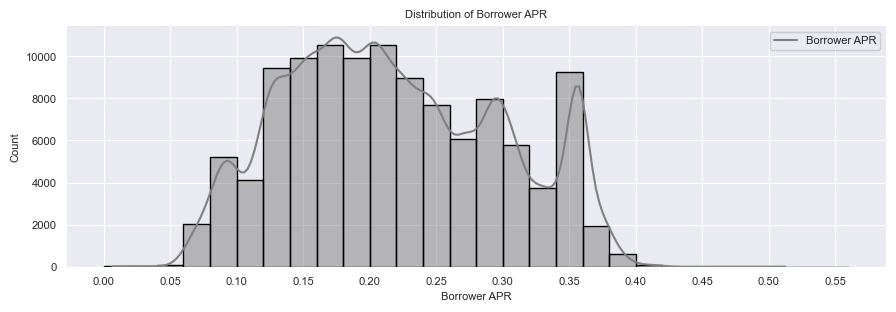

In [25]:
bins = np.arange(0, loans_subset.BorrowerAPR.max() + 0.05, 0.02)
sns.displot(loans_subset,
            x='BorrowerAPR',
            bins=bins,
            height=3,
            aspect=3,
            edgecolor='black',
            color='gray',
            kde='True')

x_label = np.arange(0, loans_subset.BorrowerAPR.max() + 0.05, 0.05)
plt.xticks(x_label)
plt.legend(loc=1, ncol=1, framealpha=1, labels=['Borrower APR'])
plt.title("Distribution of Borrower APR")
plt.xlabel('Borrower APR');

#### - The distribution of borrower APR looks multimodal. A small peak centered at 0.10, a large peak centered at 0.18. There is also a small peak centered 0.30. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

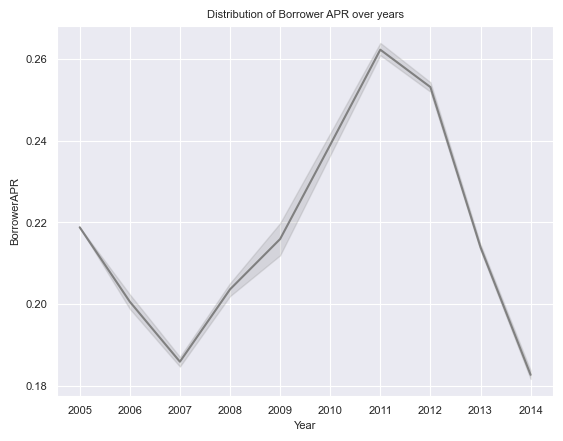

In [26]:
sns.lineplot(loans_subset, x='Year', y='BorrowerAPR', color='gray')
x = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
plt.xticks(x)
plt.savefig('2.png', dpi=200)
plt.title("Distribution of Borrower APR over years");

* Overtime Borrower APR had 2 negatives peak's, the first in 2007 and the second in 2011.

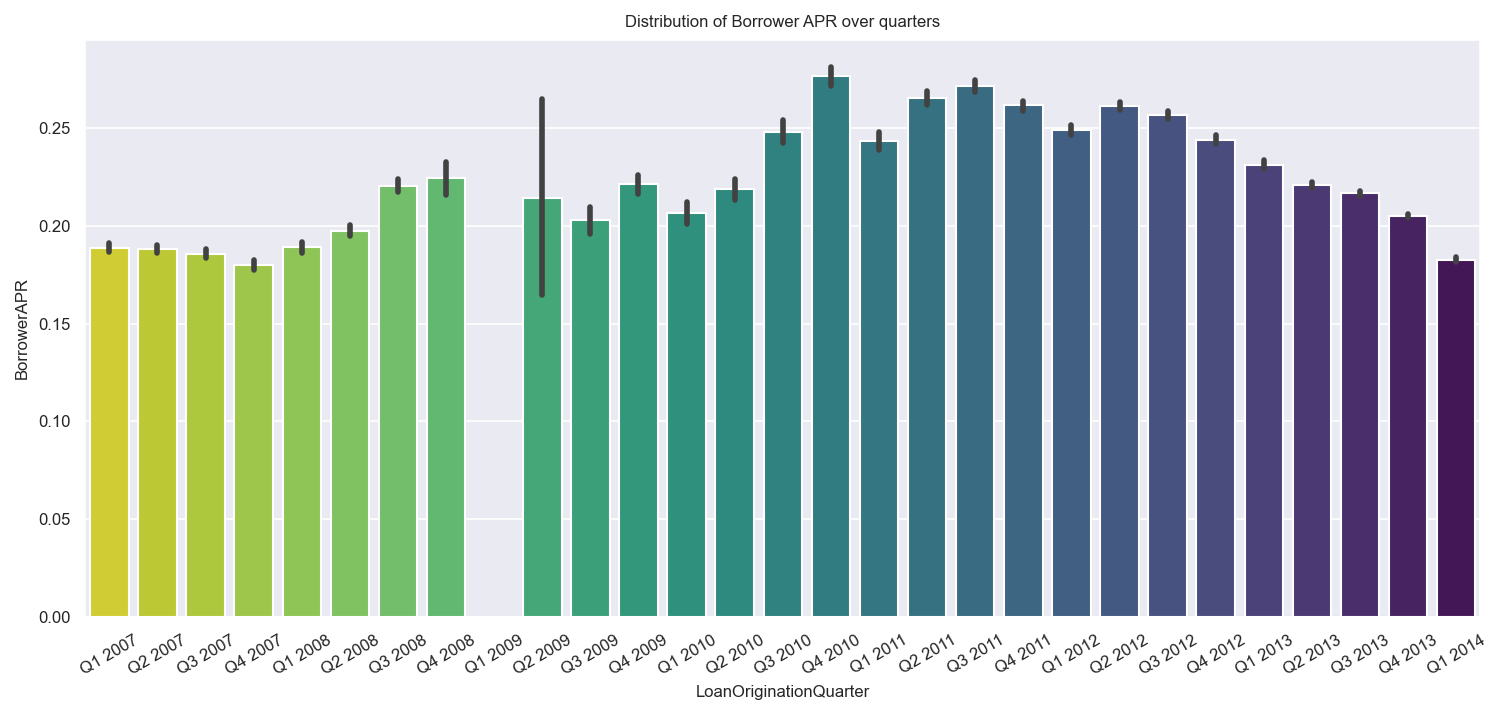

In [27]:
plt.figure(figsize=[12, 5], dpi=150)
sns.barplot(loans_subset,
            x='LoanOriginationQuarter',
            y='BorrowerAPR',
            palette='viridis_r')
plt.xticks(rotation=30)
plt.title("Distribution of Borrower APR over quarters");

In [28]:
loans_subset[loans_subset.LoanOriginationQuarter =='Q1 2009'].shape

(0, 14)

## Borrower APR evolution over quarter of years

- Top 3  borrower rates:Q2 2010;Q3 2010;Q4 2009.
- Bottom 3 borrower rates:Q1 2006; Q1 2013;Q3 2006

* We can observe a missing data on Q1 2009, that relates to when Prosper Marketplace was making changes to its credit policy.

Source: https://en.wikipedia.org/wiki/Prosper_Marketplace

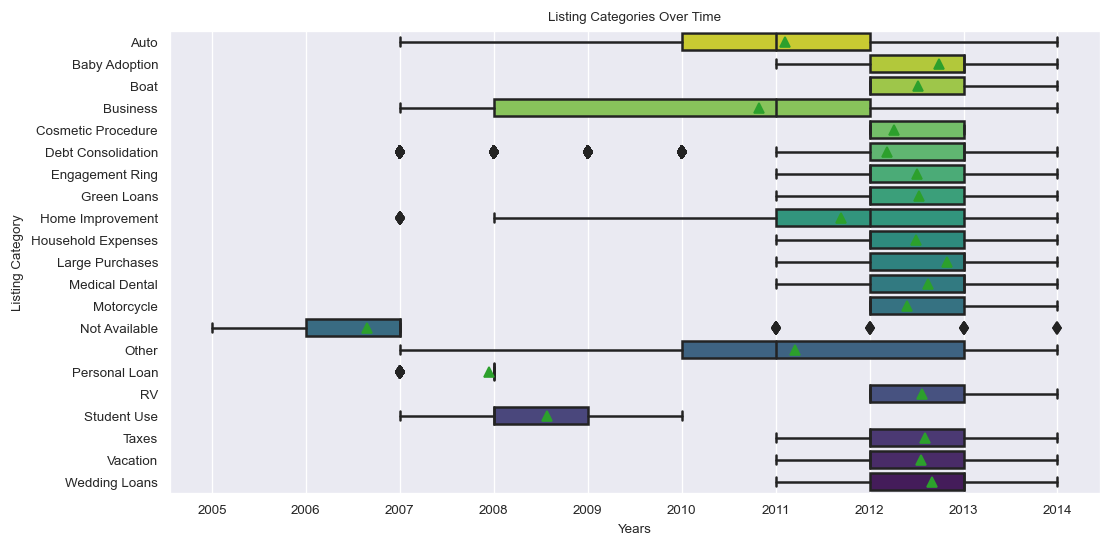

In [29]:
plt.figure(figsize=[10, 5], dpi=120)
ax = sns.boxplot(x='Year',
                 y='ListingCategory',
                 data=loans_subset,
                 palette='viridis_r',showmeans=True)
plt.xlabel('Years')
plt.ylabel('Listing Category')
ax.set_xticks(range(2005, 2015));
plt.title("Listing Categories Over Time");

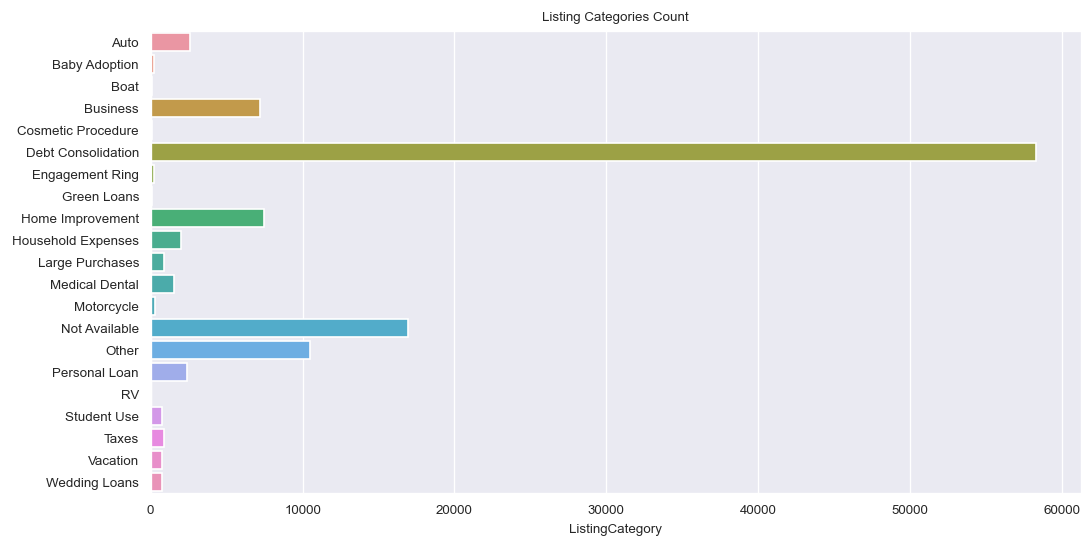

In [30]:
plt.figure(figsize=[10, 5], dpi=120)
sns.barplot(y=loans_subset.ListingCategory.value_counts().index, x=loans_subset.ListingCategory.value_counts())
plt.title("Listing Categories Count");

* Listing Categories we're diversified after 2011, in the boxplot we can see that Business, Auto,Home Improvement stick around more time. Student Use wasnt conceded after 2010.

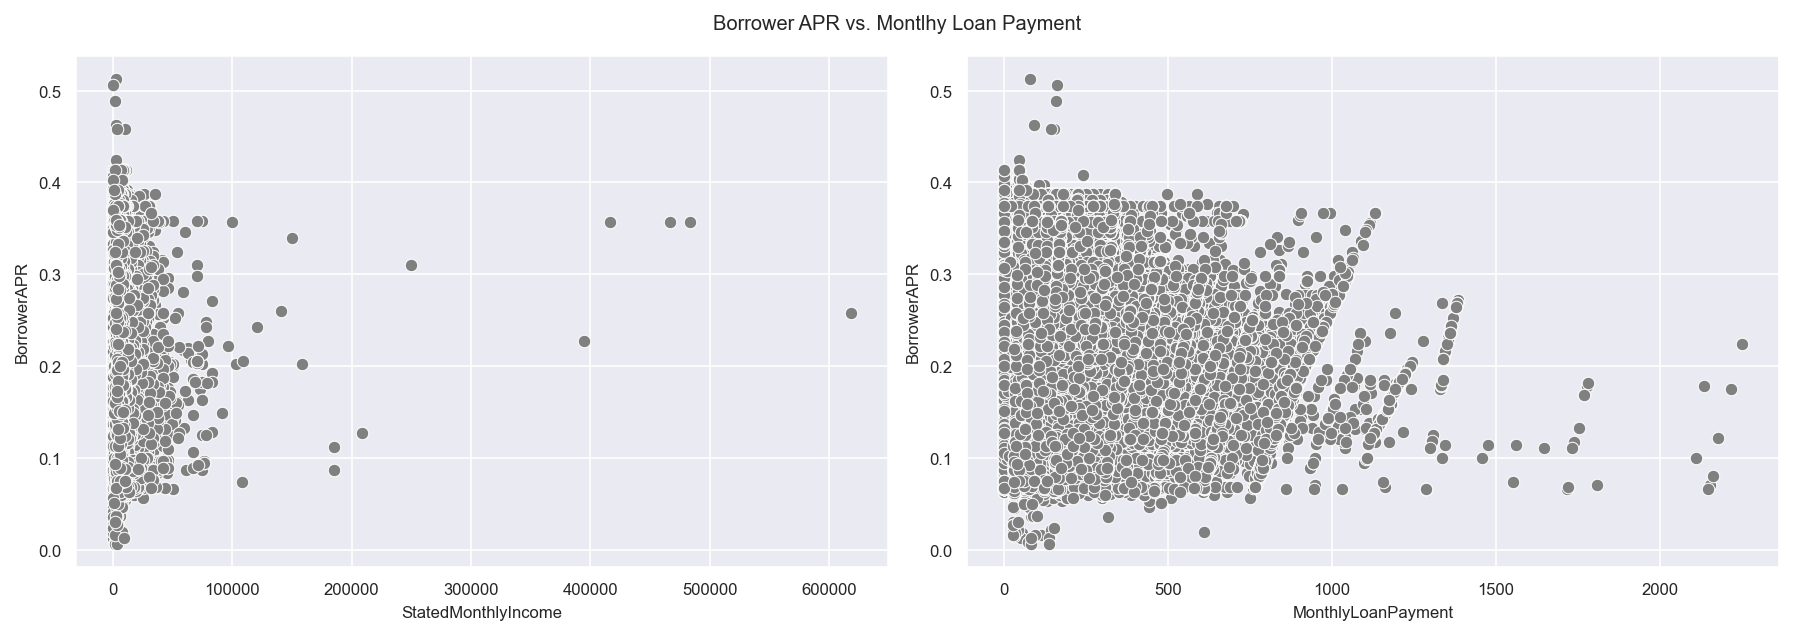

In [31]:
fig, axes = plt.subplots(1, 2, figsize=[12, 4], dpi=150)
sns.scatterplot(data=m1,
                y=m1['BorrowerAPR'],
                x=m1['StatedMonthlyIncome'],
                ax=axes[0],
                color='gray')
sns.scatterplot(data=loans_subset,
                y='BorrowerAPR',
                x='MonthlyLoanPayment',
                ax=axes[1],
                color='gray')
plt.tight_layout()
plt.suptitle("Borrower APR vs. Montlhy Loan Payment",y=1.04);

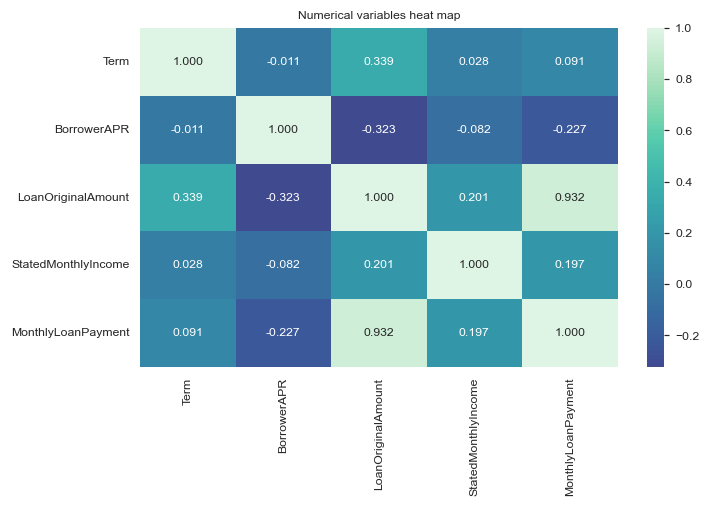

In [32]:
num_vars = [
    'Term', 'BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome',
    'MonthlyLoanPayment'
]
cat_vars = ['ProsperRating (Alpha)','IsBorrowerHomeowner']

plt.figure(figsize=[7, 4], dpi=110)
sns.heatmap(loans_subset[num_vars].corr(),
            annot=True,
            fmt='.3f',
            cmap=cmap,
            center=0)
plt.title("Numerical variables heat map");

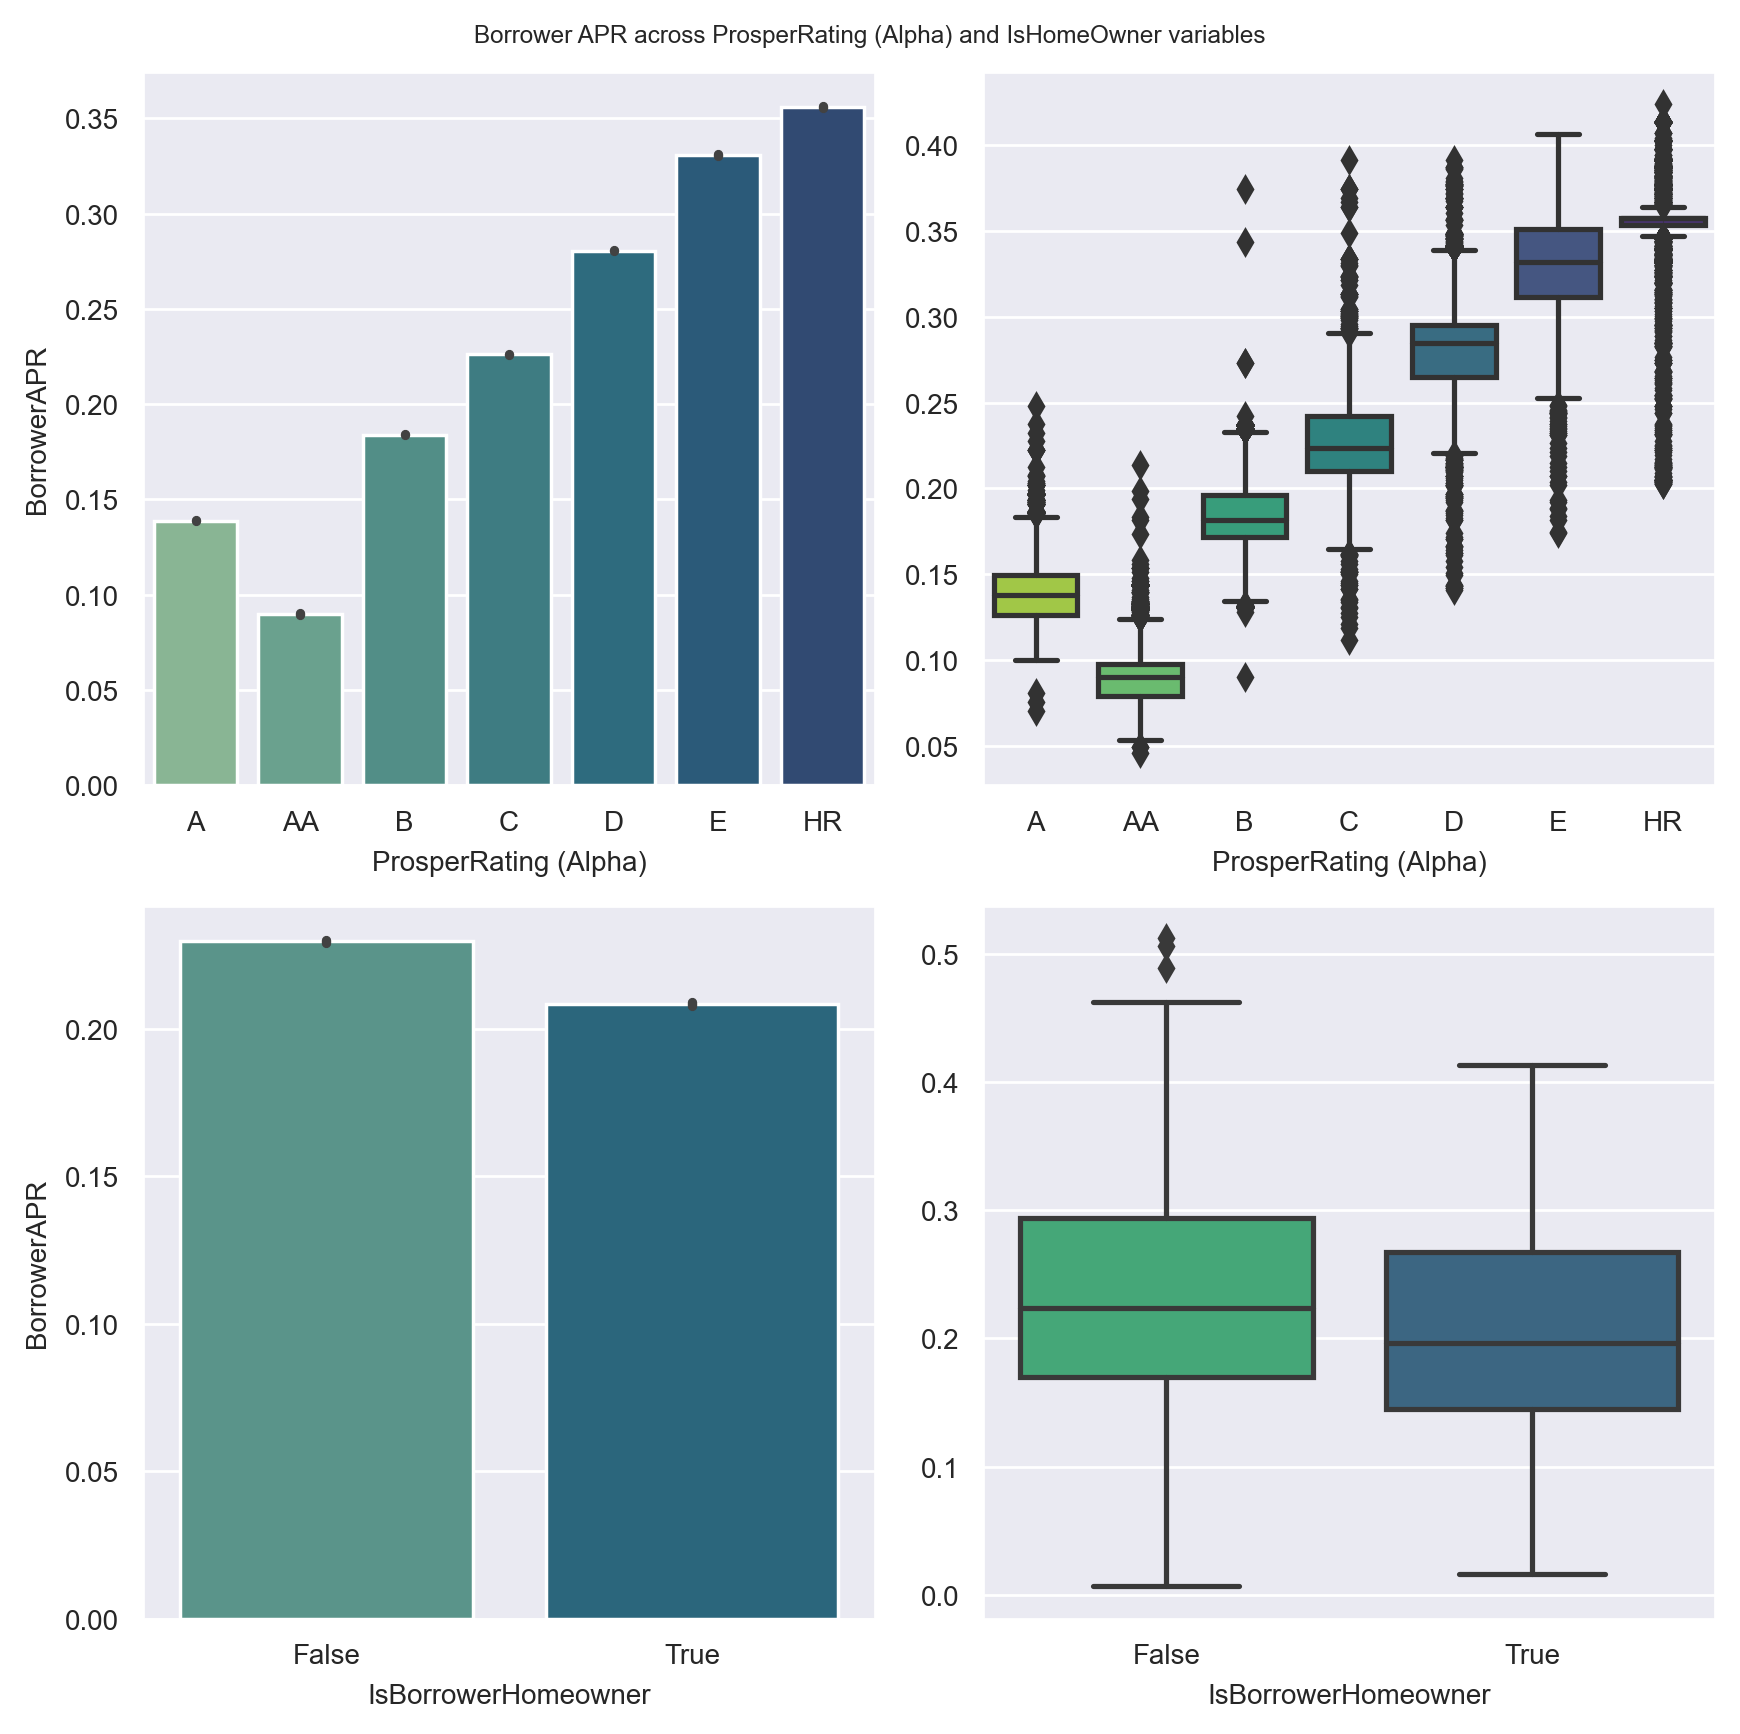

In [33]:
fig, axes = plt.subplots(2, 2, figsize=[7, 7], dpi=250)
fig.suptitle(
    "Borrower APR across ProsperRating (Alpha) and IsHomeOwner variables",
    fontsize=7)
for idx, col in enumerate(cat_vars):
    sns.barplot(data=loans_subset,
                x=col,
                y='BorrowerAPR',
                ax=axes[idx][0],
                palette='crest')
    sns.boxplot(data=loans_subset,
                y='BorrowerAPR',
                x=col,
                ax=axes[idx][1],
                palette='viridis_r')
    axes[idx][1].set_ylabel("")
plt.tight_layout();

 - The correlation coefficient of borrower APR and loan original amount is -0.32, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

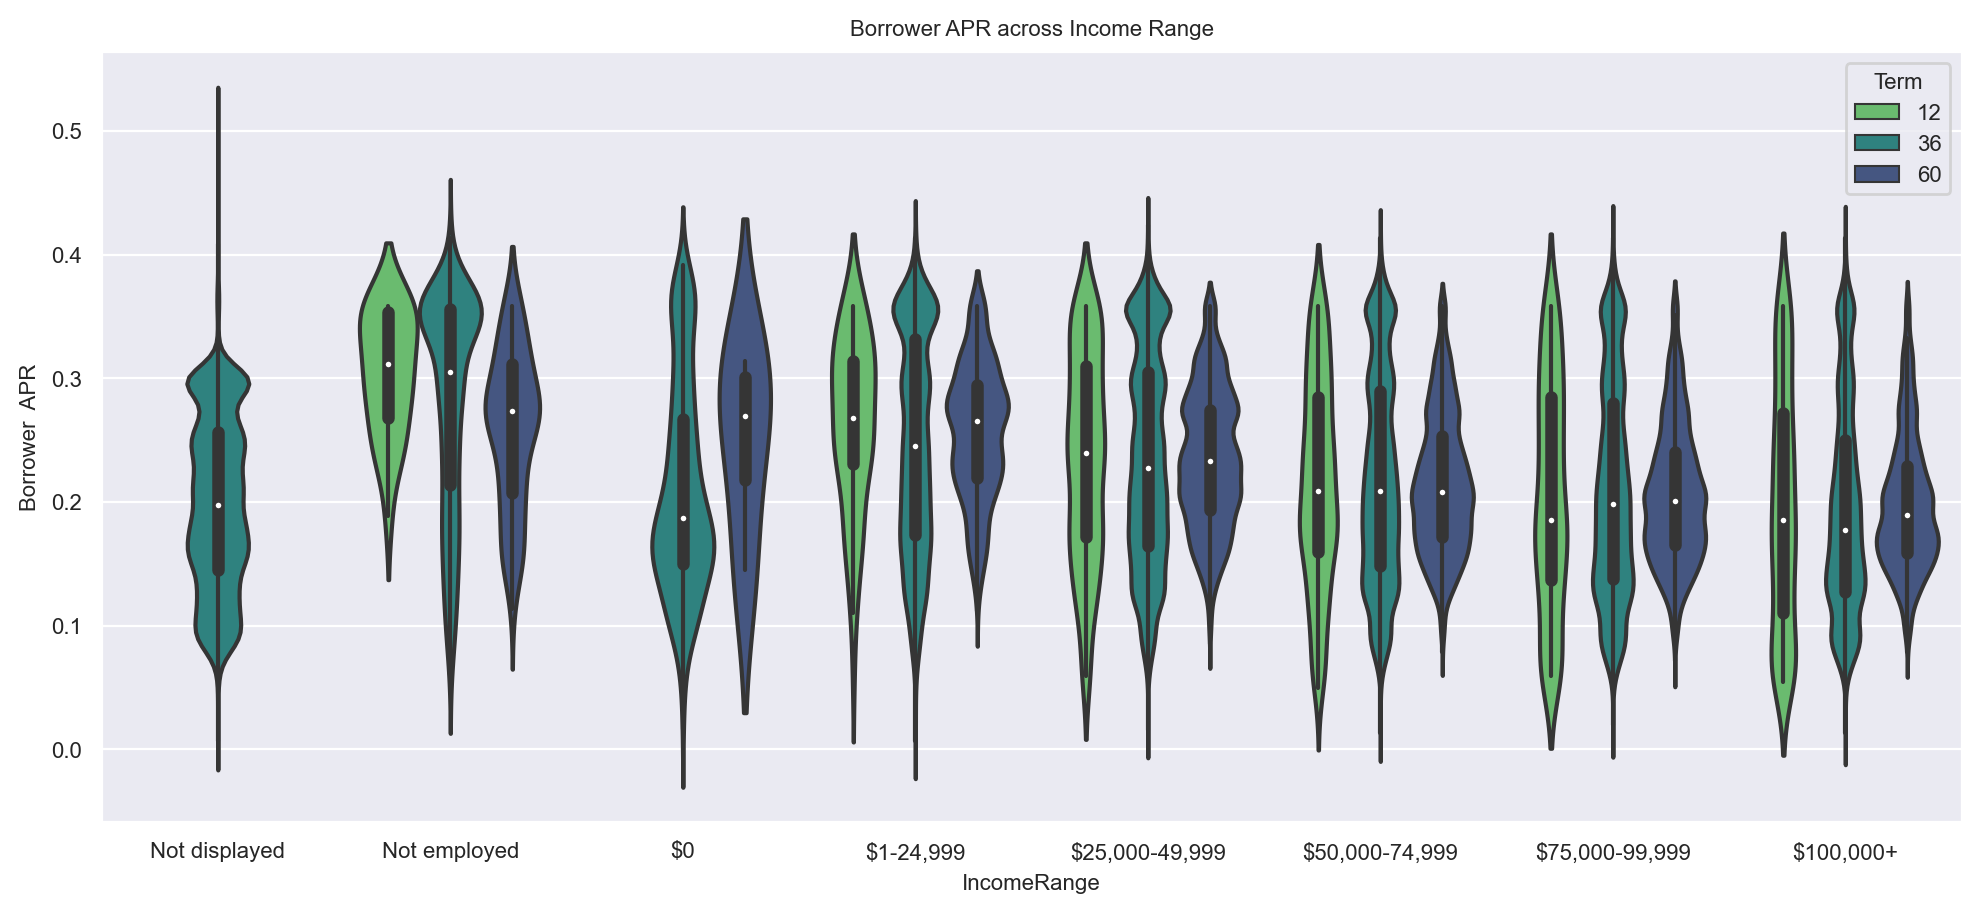

In [34]:
#Income Range
plt.figure(figsize=[12, 5], dpi=200)
sns.violinplot(x='IncomeRange',
               y='BorrowerAPR',
               data=loans_subset,
               palette='viridis_r',
               hue='Term')
plt.title('Borrower APR across Income Range')
plt.ylabel('Borrower  APR');

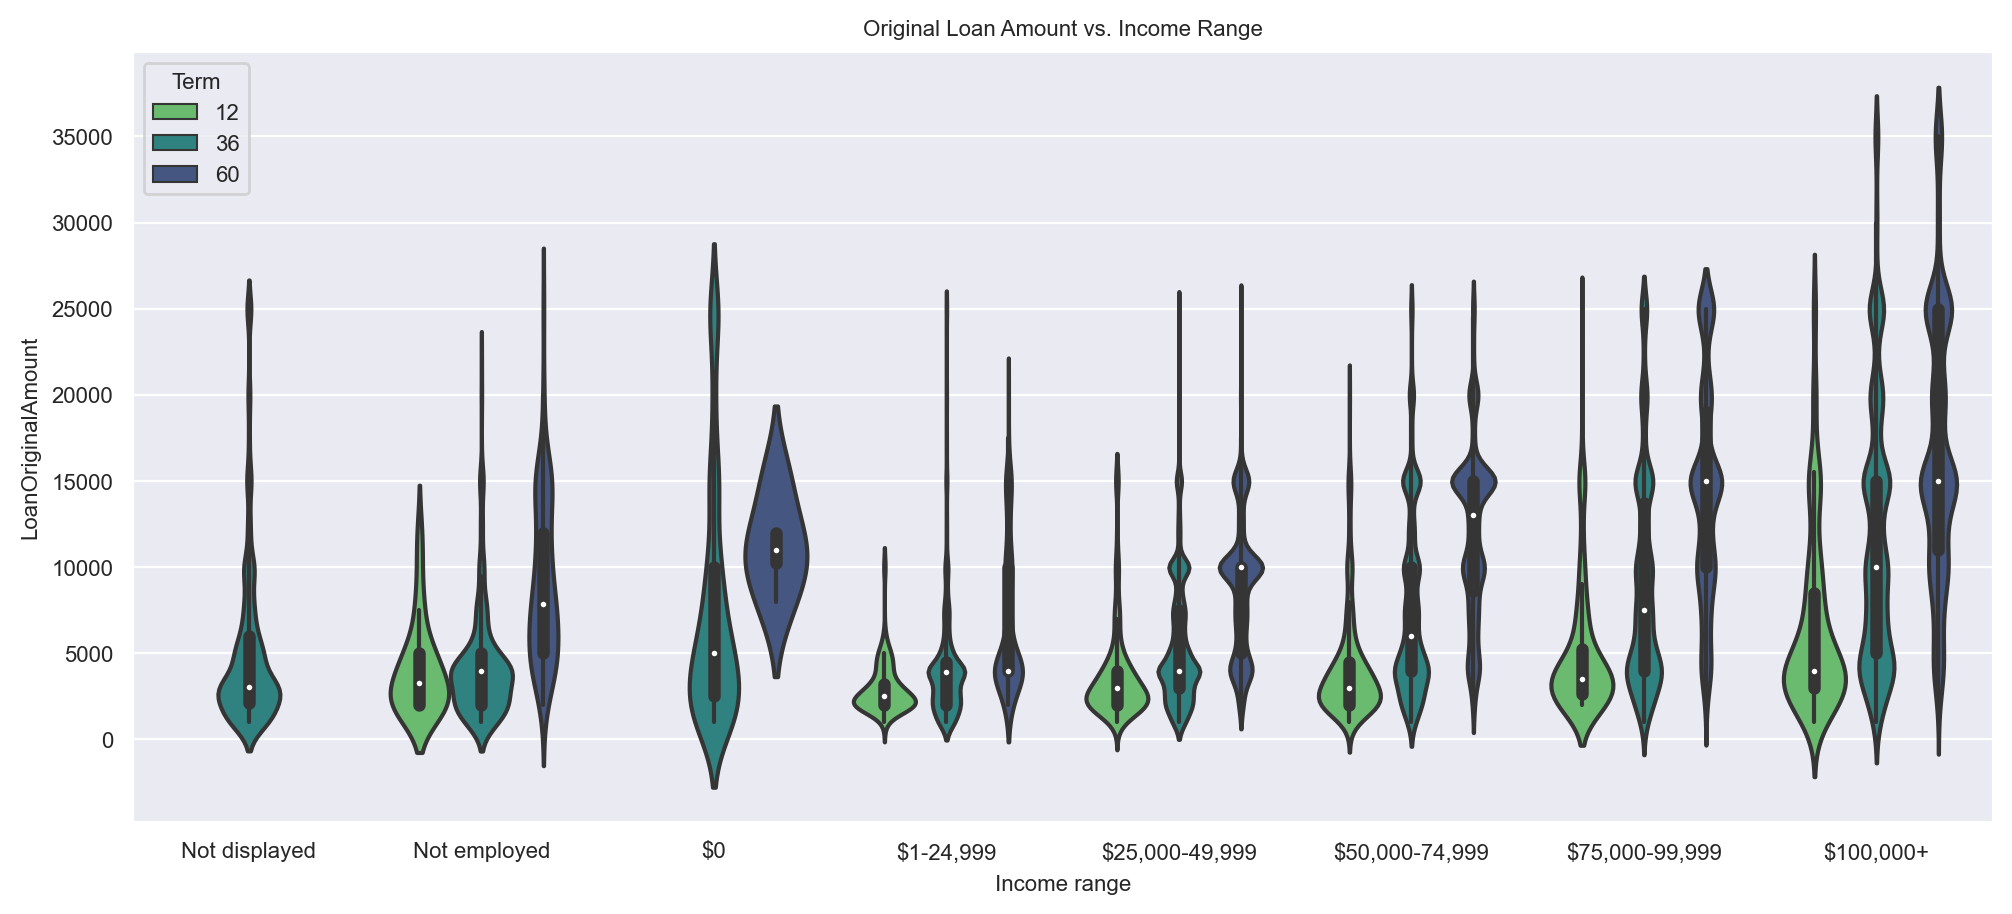

In [35]:
plt.figure(figsize=[12, 5], dpi=200)
sns.violinplot(
    data=loans_subset,
    x='IncomeRange',
    y='LoanOriginalAmount',
    palette='viridis_r',hue='Term'
)
plt.xlabel('Income range')
plt.title('Original Loan Amount vs. Income Range');

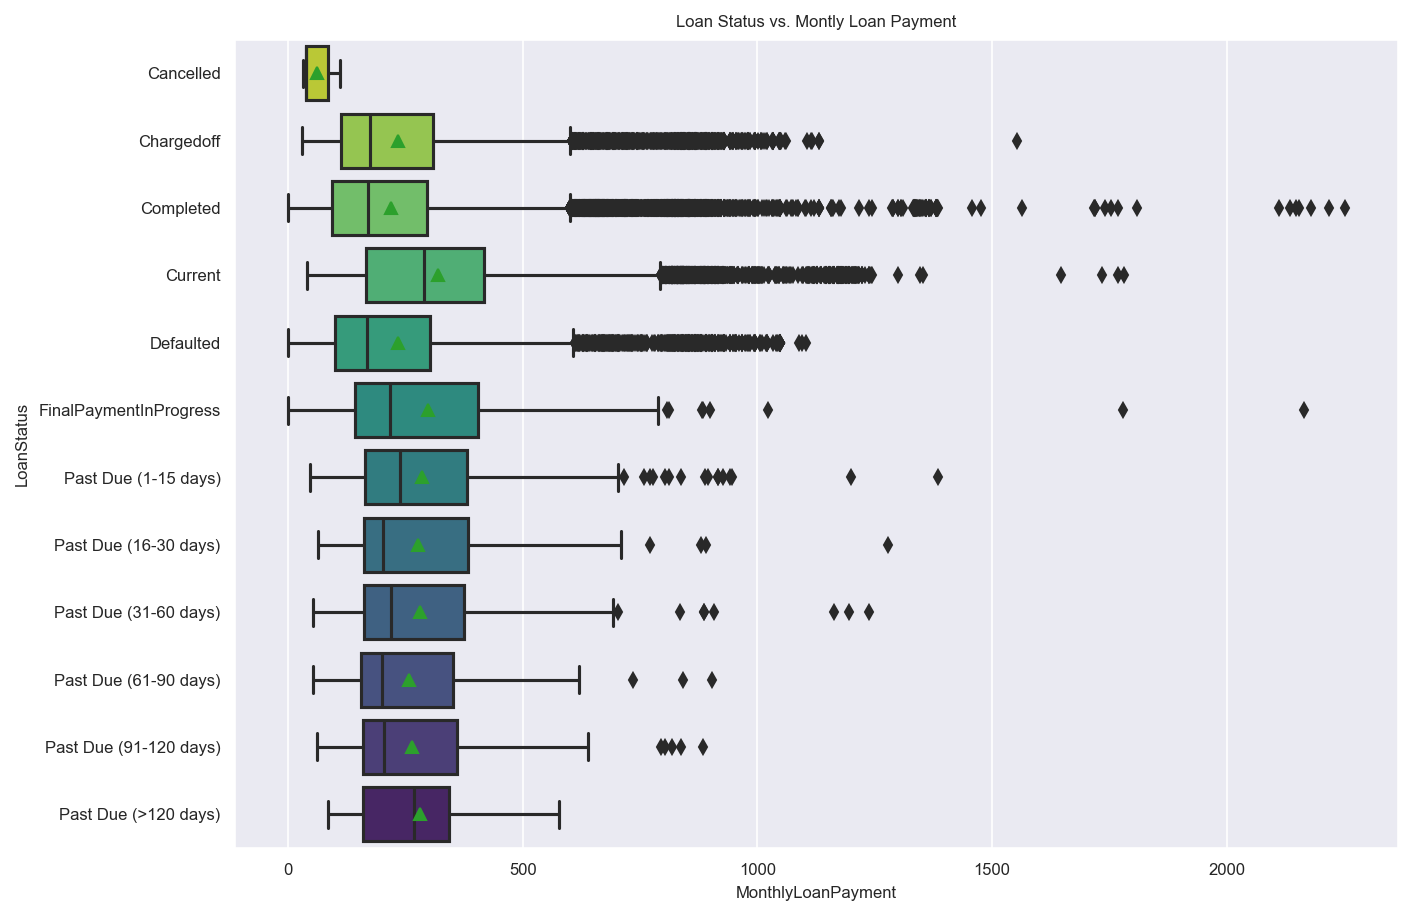

In [36]:
plt.figure(figsize=[10, 7], dpi=150)
sns.boxplot(data=loans_subset,
            y='LoanStatus',
            x=m1['MonthlyLoanPayment'],
            showmeans=True,
            palette='viridis_r')
plt.title('Loan Status vs. Montly Loan Payment');

 #### - The status of the loans in the dataset is generally in current status (49,6%), with 33,41% of them completed,10,52% chargedoff and only 4,40% defaulted. As we can see the majoraity of defaulted loans has higher montlhy payment as outliers.
 
  

- The above violinplot  strongly indicates that for each income range, overall interest rates decrease as income ranges increase, expect for "Not displayed", could be missing data, need further investigation.

 - The bar chart states that higher prosper rating (alpha) lower is the Borrower APR rate.

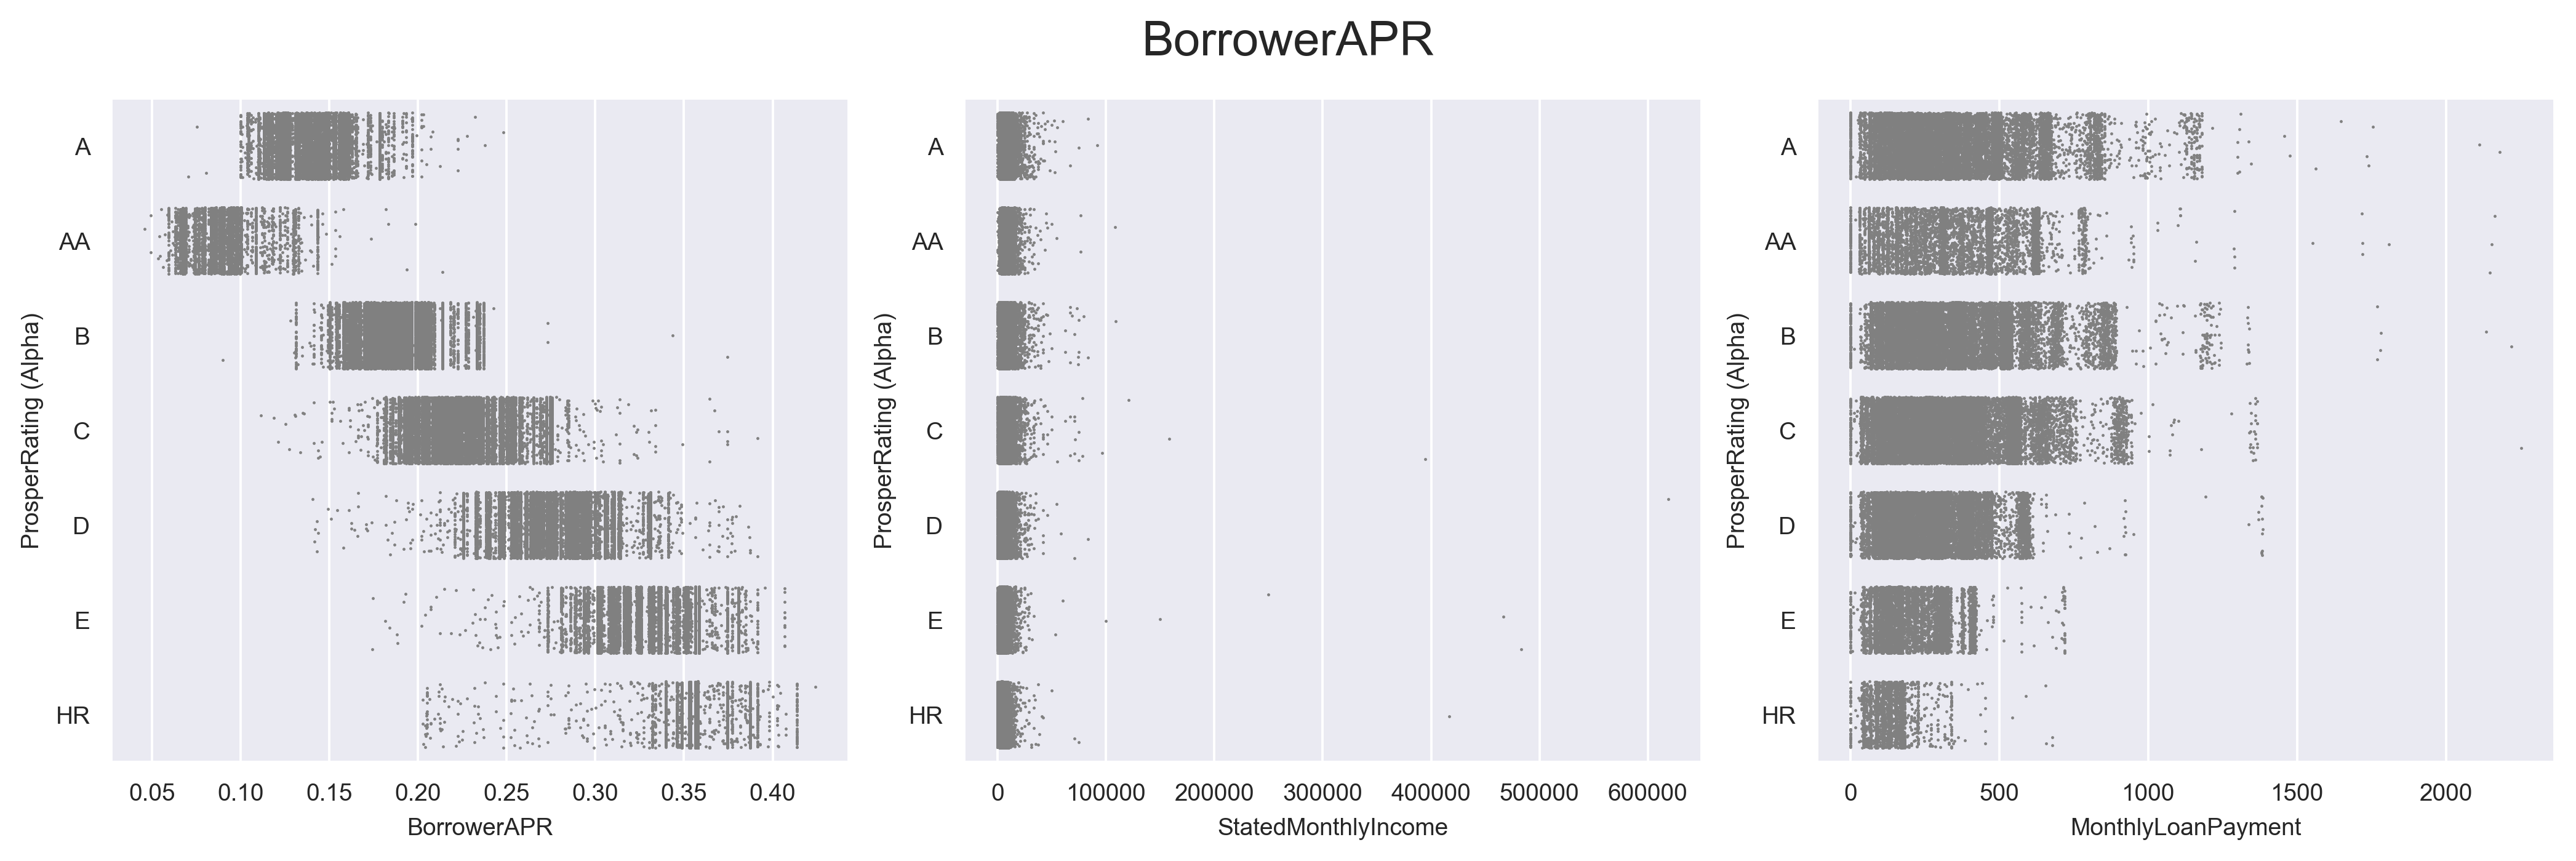

In [37]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4], dpi=350)
fig.suptitle('BorrowerAPR', fontsize=16)
sns.stripplot(loans_subset,
              y='ProsperRating (Alpha)',
              x='BorrowerAPR',
              color='gray',
              ax=axes[0],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h')
sns.stripplot(m1,
              x=m1['StatedMonthlyIncome'],
              y=m1['ProsperRating (Alpha)'],
              ax=axes[1],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h',
              color='gray')
sns.stripplot(loans_subset,
              x='MonthlyLoanPayment',
              y='ProsperRating (Alpha)',
              ax=axes[2],
              size=1,
              jitter=0.35,
              dodge=True,
              orient='h',
              color='gray')
plt.tight_layout();

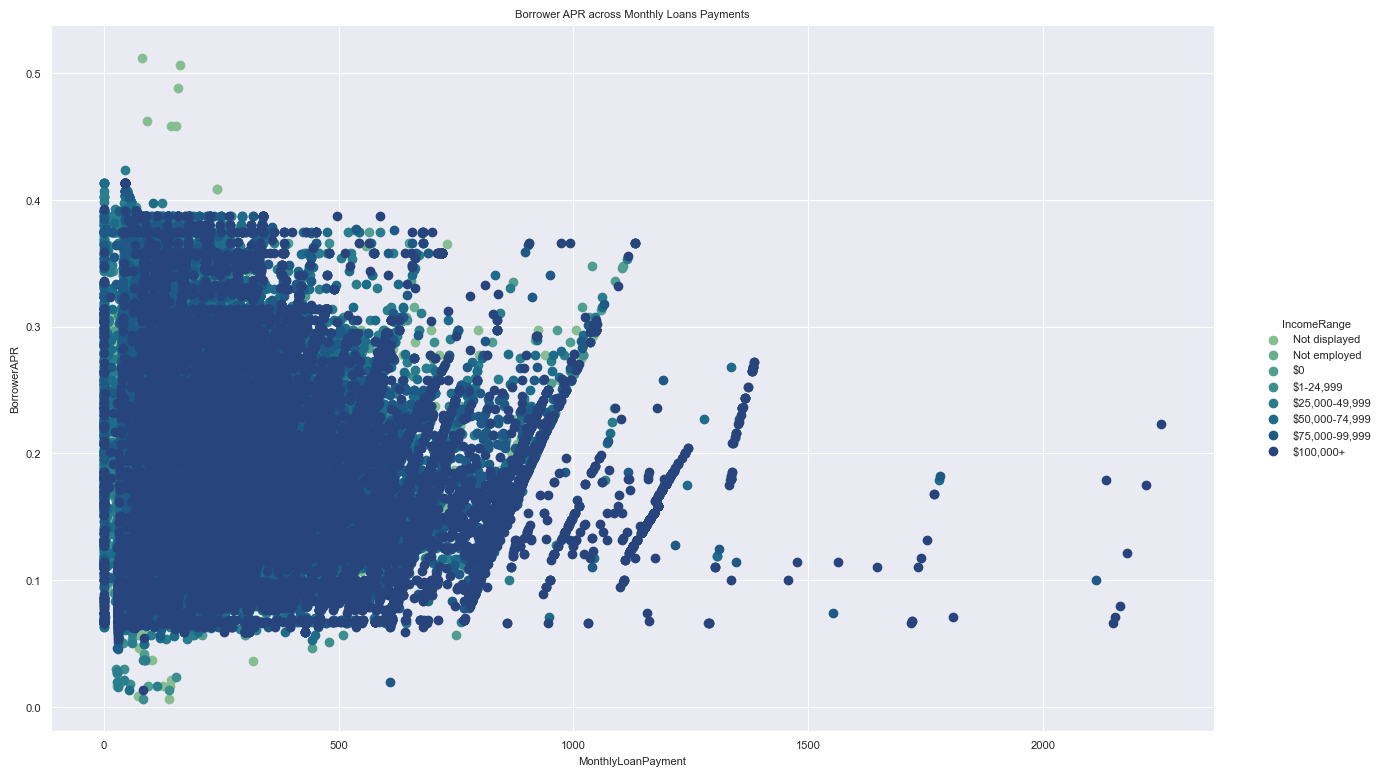

In [38]:
g = sns.FacetGrid(data=loans_subset,
                  hue='IncomeRange',
                  height=5,
                  aspect=2,
                  palette='crest')
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')
g.add_legend()
g.fig.set_size_inches(14, 8)
plt.title('Borrower APR across Monthly Loans Payments');

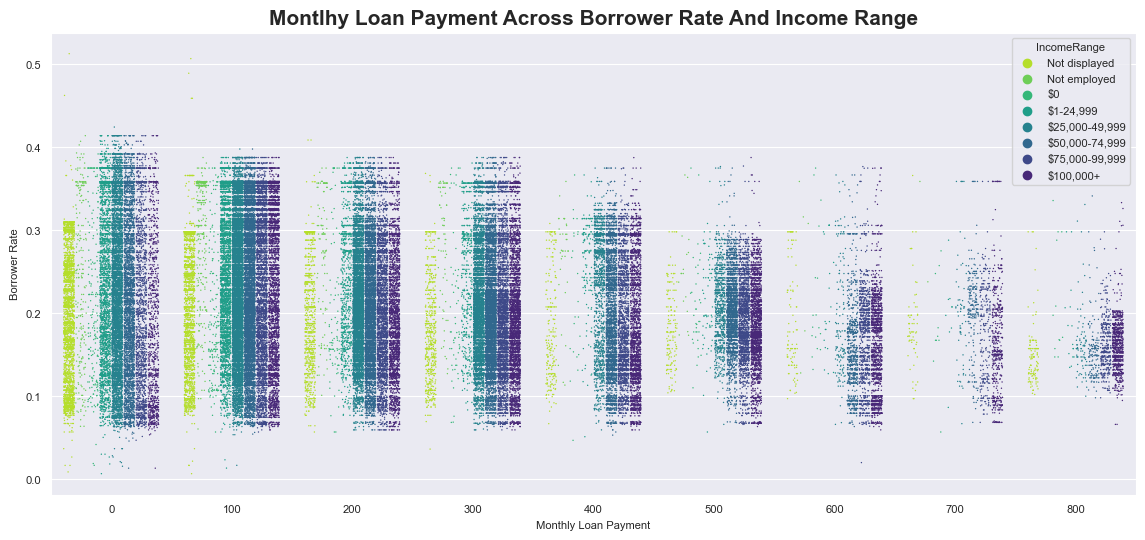

In [39]:
plt.figure(figsize=[14, 6])

# create intervals of 10 years using floor division(lowest integer) for MontlhyLoanPayment
data = loans_subset.dropna(subset=['MonthlyLoanPayment']).copy()

data['MonthlyLoanPayment_int'] = ((data['MonthlyLoanPayment'] // 100) *
                                  100).astype(int)
sns.stripplot(
    data.query('MonthlyLoanPayment<MonthlyLoanPayment.quantile(0.99)'),
    x='MonthlyLoanPayment_int',
    y='BorrowerAPR',
    hue='IncomeRange',
    hue_order=None,
    order=None,
    palette='viridis_r',
    size=1,
    jitter=0.35,
    dodge=True)
plt.title('Montlhy Loan Payment across borrower rate and income range'.title(),fontsize=15,fontweight='bold')
plt.xlabel('Monthly Loan Payment'.title())
plt.ylabel('borrower rate'.title());

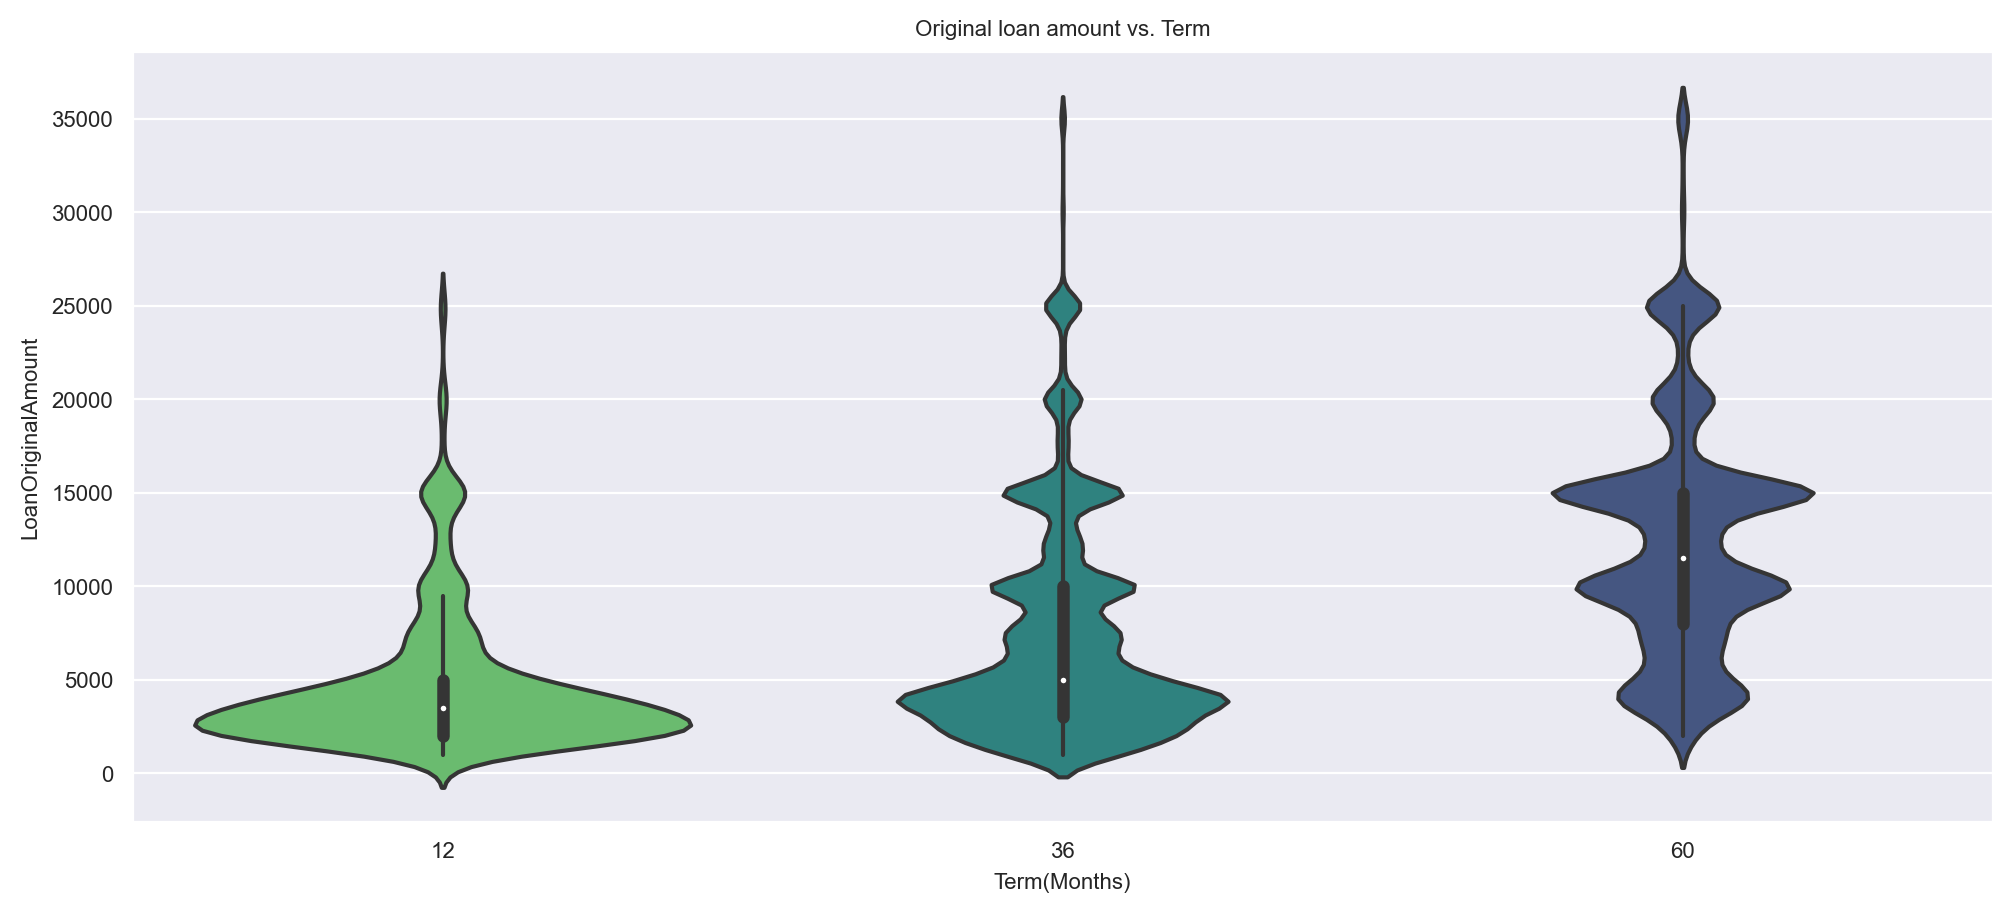

In [40]:
plt.figure(figsize=[12, 5], dpi=200)
sns.violinplot(
    data=loans_subset,
    x='Term',
    y='LoanOriginalAmount',
    palette='viridis_r',
)
plt.xlabel('Term(Months)')
plt.title('Original loan amount vs. Term');

- The median of loans original amount are increasing with the lenght of term.We can see a higher frequency of small amount of loans and short term(1 year).

<Figure size 2400x1000 with 0 Axes>

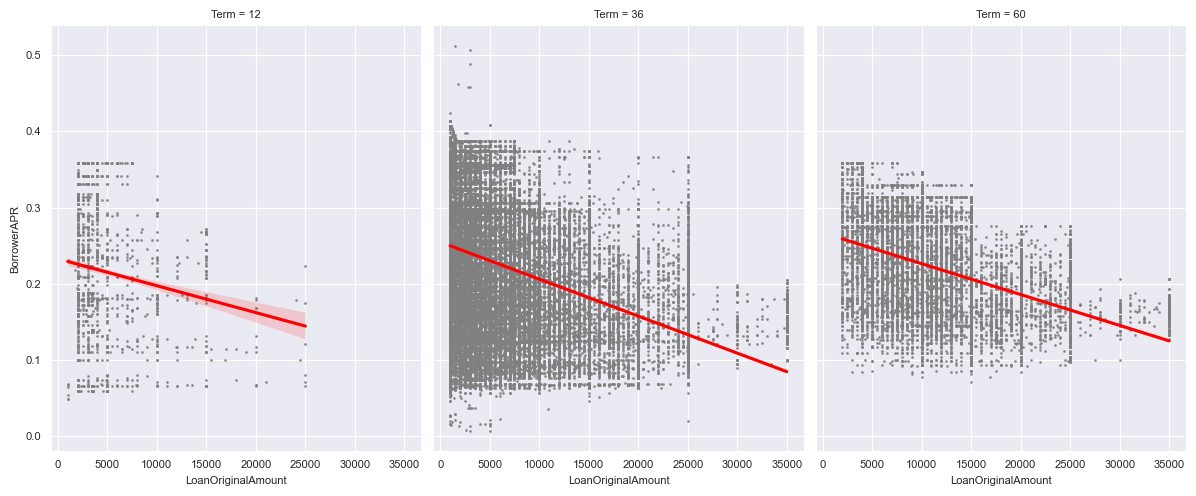

In [41]:
plt.figure(figsize=[12, 5], dpi=200)
g = sns.FacetGrid(data=loans_subset,
                  aspect=0.8,
                  height=5,
                  col='Term',
                  col_wrap=3)
g.map(sns.regplot,
      'LoanOriginalAmount',
      'BorrowerAPR',
      scatter_kws={
          "s": 1,
          "color": "gray"
      },
      line_kws={"color": "red"})
fig.suptitle("Borrower APR vs. Term and Original Loan Amount", fontsize=7);

### Conclusion


### Univariate Exploration: Borrower APR 
  * Range is from 0.01 to 0.51, and the mean value is around 0.22.
  
  * From 2005 t0 2015, Borrower APR has the low point in 2007 with 0.006, and his high peak was in 2011 with 0.512.
  
  
### Bivariate Exploration:
  * Exploring Listing categories, the top 3 segment are: Debt Consolidation (58308),Not Available(16965),Other(10494).Along the years, Auto,Debt Consolidation and Other stick around more time.
 
  * Stated monthly income doesn't seem  there is a interaction  between term and borrower rating (APR), the pattern of term is similar among different months. But for original loan amount, there is a interaction between term and rating. We can see that with better Prosper rating (Alpha), the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.
  
   * The correlation coefficient of borrower APR and loan original amount is -0.32, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.
  
  * About Prosperscore (Alpha) in depth, we can see a pattern as score increases the borrower rate (APR) descreases, unless for 'AA' score.
  
  * Homeonwers get lower rates that borrowers that dont own a home.

### Multivariate Exploration:

  * In multivariate exploration, it's observed that within each income range group, the rate increases as the term increases, but for the same term, people with higher income are able to be granted a lower interest rate.
  
  * The multivariate exploration showed that the relationship between borrower APR and loan amount is  negative to slightly positive when the Term increased from 12 to 60 months. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.